## An Exploration of UN data
This project is an exploratory analysis on two country-level metrics, gross domestic product (GDP) per capita and overall life expectancy. 
### Data Source:
 [http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD](http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD). 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read in Data

In [4]:
gdp = pd.read_csv('../Data/gdp_per_capita.csv')

### Dropping and Renaming Columns

In [6]:
gdp = gdp.drop(['Value Footnotes'], axis = 1)
gdp = gdp.rename(columns={'Country or Area':'Country','Value':'GDP'})

### Data frame dimensions and data types
* Find the number of rows and columns
* Find the data types of its columns
* Fix data types if necessary

In [8]:
row_count = gdp.shape[0]
col_count = gdp.shape[1]
print(f'There are {row_count:,} rows and {col_count:,} columns in the "gdp" data frame')

There are 7,662 rows and 3 columns in the "gdp" data frame


In [9]:
gdp['Year'] = gdp['Year'].astype(str)

In [10]:
gdp['Year'] = gdp['Year'].astype(str)
gdp.dtypes

Country     object
Year        object
GDP        float64
dtype: object

### Exploring the year 2021
* Create a new dataframe by subsetting `gdp` to just the year 2021
* Number of countries are represented in 2021
* Countries are least represented in the accross all years
* Why so few observations
* Use `.describe()` to find the summary statistics for GDP per capita in 2021.
* Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram).
* Find the top 5 counties and bottom 5 countries by GDP per capita in 2021.

In [12]:
gdp_2021 = gdp[gdp['Year'] == '2021']
unique_countries = gdp_2021['Country'].nunique()
print(f'In 2021 there were {unique_countries} represented')

In 2021 there were 241 represented


In [13]:
gdp_least_represented = gdp['Country'].value_counts().reset_index()
gdp_least_represented = gdp_least_represented.nsmallest(5, 'count')

In [14]:
least_represented_list = gdp_least_represented['Country']
years_in_lrl = gdp[gdp['Country'].isin(least_represented_list)]
#years_in_lrl.head(50)

In [15]:
#for country in least_represented_list

In [16]:
describe_2021 = gdp_2021['GDP'].describe().reset_index()
describe_2021 = describe_2021.rename(columns={'index':'Index'})
describe_2021

,Index,GDP
0,count,241.000000
1,mean,20711.570080
2,std,20916.978968
3,min,714.066712
4,25%,5044.196028
5,50%,13754.802423
6,75%,30974.370692
7,max,115683.493708


The shape of the distribution below is skewed to the right.

The shape of the distribution below is skewed to the right.


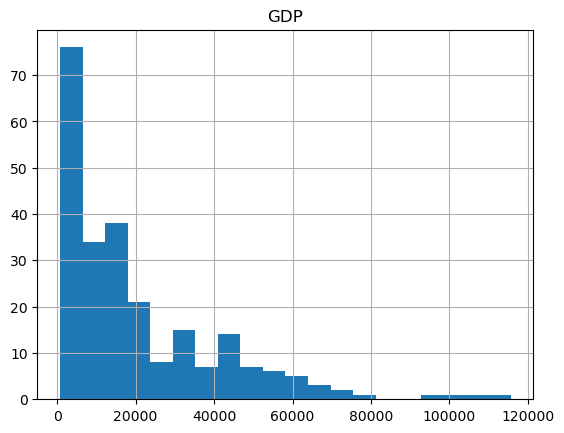

In [29]:
gdp_2021.hist(column='GDP',bins = 20)
print('The shape of the distribution below is skewed to the right.')

In [30]:
top_five_gdp_2021 = gdp_2021.nlargest(columns ='GDP',n= 5)
top_five_gdp_2021.head()

,Country,Year,GDP
4147,Luxembourg,2021,115683.493708
6107,Singapore,2021,107741.118436
3278,Ireland,2021,102785.490239
5745,Qatar,2021,92862.571798
680,Bermuda,2021,78570.489515


In [31]:
bottom_five_gdp_2021 = gdp_2021.nsmallest(columns ='GDP',n= 5)
bottom_five_gdp_2021.head()

,Country,Year,GDP
972,Burundi,2021,714.066712
1216,Central African Republic,2021,837.504686
1629,Dem. Rep. Congo,2021,1073.643271
6272,Somalia,2021,1136.735989
5073,Niger,2021,1186.576809


### Comparing 2021 with other years
* Pivot the data for 1990 and 2021
* Drop any rows that are missing values for either 1990 or 2021.
* Create a new column in `gdp_pivoted` named `Percent_Change`.
* Show the top two countries in terms of growth when comparing GDP in 1990 and 2021

In [108]:
#Create initial pivot table
gdp_1990_2021 = gdp[(gdp['Year'] == '1990') | (gdp['Year'] == '2021')]
gdp_pivoted = pd.pivot_table(gdp_1990_2021, values='GDP', index=['Country'],

                       columns=['Year'], aggfunc="sum")

#Identify only the n/a countries 
null_list = gdp_pivoted.isna()
null_list = null_list[(null_list['1990'] == True) | (null_list['2021'] == True)]
null_list = null_list.index.to_list()

# filter pivot table to remove n/a countries
filtered_gdp_pivoted = gdp_pivoted[~gdp_pivoted.index.isin(null_list)]

# add a new column to show % change
filtered_gdp_pivoted = filtered_gdp_pivoted.copy()
filtered_gdp_pivoted['Percent_Change'] = (
    (filtered_gdp_pivoted['2021'] - filtered_gdp_pivoted['1990']) / filtered_gdp_pivoted['1990']) * 100

In [64]:
negative_growth = filtered_gdp_pivoted[filtered_gdp_pivoted['Percent_Change'] <0]
negative_growth.sort_values(by = 'Percent_Change')
change_count = len(negative_growth.index)
print(f'A total of {change_count} countries experienced negative GDP growth from 1990 to 2021')

A total of 19 countries experienced negative GDP growth from 1990 to 2021


<Axes: xlabel='Year', ylabel='GDP'>

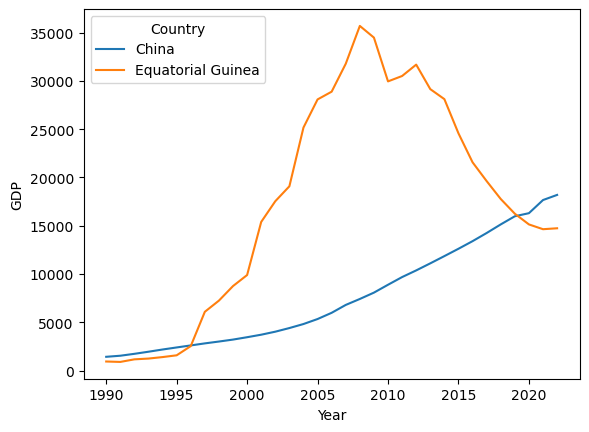

In [106]:
first_percent_change = filtered_gdp_pivoted.nlargest(1, 'Percent_Change')
second_percent_change = filtered_gdp_pivoted.nlargest(2, 'Percent_Change')
eqg_china = gdp[(gdp['Country'] == 'Equatorial Guinea') | (gdp['Country'] == 'China')]
eqg_china = eqg_china.reset_index()
eqg_china['Year'] = eqg_china['Year'].astype(float)
sns.lineplot(x='Year', y='GDP', data=eqg_china, hue='Country')

### Comparing continent trends
* Read in continents data and merge with gdp data frame
* Countries are least represented in the accross all years
* Why so few observations
* Use `.describe()` to find the summary statistics for GDP per capita in 2021.
* Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram).
* Find the top 5 counties and bottom 5 countries by GDP per capita in 2021.

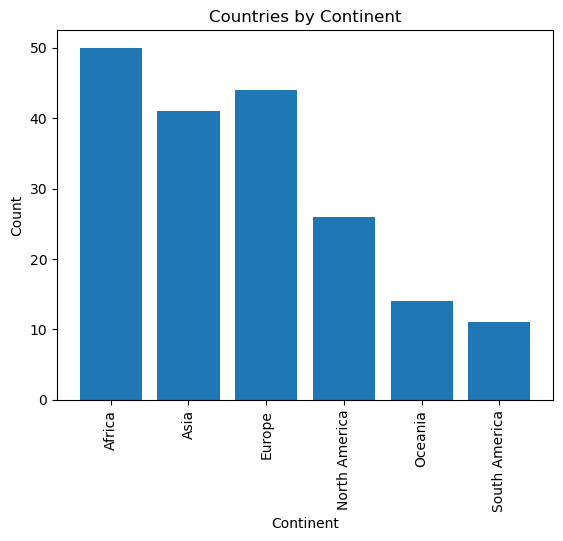

In [126]:
continents = pd.read_csv('../data/continents.csv')
gdp_continents = pd.merge(gdp, continents, on = 'Country', how = 'inner')
countries_per_continent = gdp_continents.groupby('Continent')['Country'].nunique().reset_index(name = 'Country_Count')

plt.bar(countries_per_continent.Continent,
        countries_per_continent.Country_Count)
plt.ylabel('Count')
plt.xlabel('Continent')
plt.title('Countries by Continent')
plt.xticks(rotation = 90)
plt.show()

### Exploring the relationship between GDP and Life Expectancy
* Read in life expectancy data: [https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false). 
* Use [`.melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to convert your data from wide to long.
* First country to exceed life expectancy of 80 years old
* Find the countries that had the top 3 largest GDP per capita figures for 2021.
* Create facet gridshowing the change in life expectancy over time for these three countries.
* Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2021.
* Find the correlation between Life Expectancy and GDP per Capita for the year 2021.
* Add a column to `gdp_le_2021` and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy.

In [211]:
le = pd.read_csv('../data/life_exp.csv')
le = le.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])
le_melt = pd.melt(le, id_vars = 'Country Name', var_name = 'Year', value_name = 'Life_exp')
le_melt = le_melt.rename(columns = {'Country Name' : 'Country'})
gdp_le = pd.merge(gdp, le_melt, on = ['Country','Year'], how = 'inner')

In [213]:
first_to_eighty = le_melt[le_melt['Life_exp'] >= 80]
first_to_eighty_filtered = first_to_eighty[first_to_eighty['Year'] == first_to_eighty['Year'].min()]
first_country = first_to_eighty_filtered.iloc[0,0]
print(f'{first_country} was the first country to exceed a life expectancy of 80 years old')

Japan was the first country to exceed a life expectancy of 80 years old


In [215]:
gdp_le_2021 = gdp_le[gdp_le['Year'] == '2021']

In [217]:
count_of_eighty = gdp_le_2021[gdp_le_2021['Life_exp']>=80]
count_of_eighty= count_of_eighty.shape[0]
print(f' In 2021 there were {count_of_eighty} that had a life expectancy of at least 80 years old')

 In 2021 there were 33 that had a life expectancy of at least 80 years old


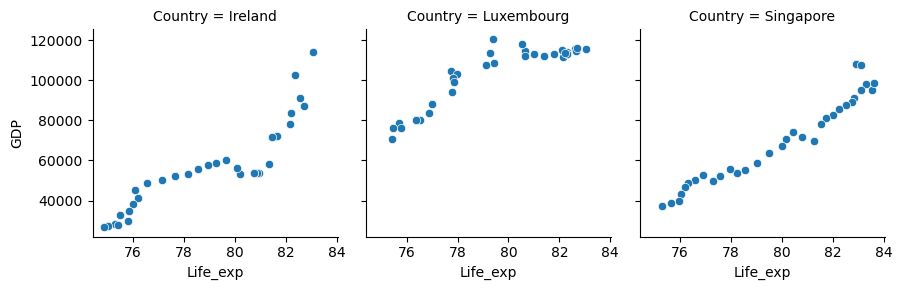

In [219]:
top_three = gdp_le_2021.nlargest(3,'GDP')['Country'].head().to_list()
gdp_top_three = gdp_le[gdp_le['Country'].isin(top_three)]
a = sns.FacetGrid(gdp_top_three, col = 'Country')
a.map(sns.scatterplot,'Life_exp','GDP')
a.add_legend();

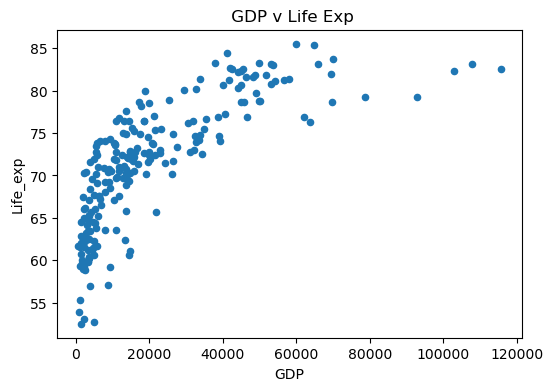

In [221]:
gdp_le_2021.plot(kind = 'scatter', x = 'GDP', y = 'Life_exp', figsize = (6,4))
plt.title(' GDP v Life Exp');

In [249]:
corr_coef = gdp_le_2021[['Life_exp','GDP']].corr().iloc[0,1]
corr_coef

print(f' A correlation coefficient of {corr_coef:.2f} indicates a strong relationship between two variables')

 A correlation coefficient 0.76 indicates a strong relationship between two variables


How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

In [265]:
gdp_le_2021 = gdp_le_2021.copy()
gdp_le_2021['GDP_log'] = np.log(gdp_le_2021['GDP'])
corr_coef_log = gdp_le_2021[['Life_exp','GDP_log']].corr().iloc[0,1]
corr_coef_log

print(f' Converting the GDP to a log scale increased the score to {corr_coef_log:.2f}'

SyntaxError: incomplete input (4079460695.py, line 6)

,Life_exp,GDP_log
Life_exp,1.000000,0.857356
GDP_log,0.857356,1.000000


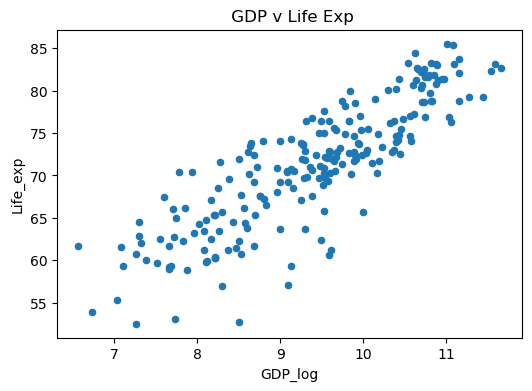

In [261]:
gdp_le_2021.plot(kind = 'scatter', x = 'GDP_log', y = 'Life_exp', figsize = (6,4))
plt.title(' GDP v Life Exp');

### Bonus: Solo Exploration:
1. Choose and download another data set from the UN data [http://data.un.org/Explorer.aspx](http://data.un.org/Explorer.aspx) to explore. You may want to combine your new dataset with one or both of the datasets that you already worked with. Report any interesting correlations or trends that you find. 
2.    If time allows, check out the plotly library to add additional interativity to your plots. [https://plotly.com/python/plotly-express/](https://plotly.com/python/plotly-express/).

In [ ]:
wmn_lbr = pd.read_csv('../Data/wmn_lbr.csv')
wmn_lbr.head()

In [ ]:
wmn_lbr = wmn_lbr.drop(columns = ['Subgroup', 'Source', 'Unit', 'Value Footnotes'])
wmn_lbr = wmn_lbr.rename(columns = {'Country or Area' : 'Country','Value' : 'Wmn_Lbr_Pct'})
wmn_lbr.head()

In [ ]:
wmn_lbr['Year'] = wmn_lbr['Year'].astype(str)
wmn_lbr['Year'] = wmn_lbr['Year'].str.replace('.0',' ')
wmn_lbr.head()

In [ ]:
wmn_lbr.dtypes

In [ ]:
gdp_le['Year'] = gdp_le['Year'].astype(str)

In [ ]:
wmn_gdp = pd.merge(wmn_lbr,gdp_le, on = ['Country','Year'], how = 'inner')
wmn_gdp.head(2)

In [ ]:
wmn_gdp = pd.merge(wmn_gdp, continents, on = 'Country', how = 'inner')
wmn_gdp.head()

In [ ]:
wmn_gdp[['Wmn_Lbr_Pct','GDP']].corr()
#gdp_le_2021[['Life_exp','GDP_log']].corr()

In [ ]:
wmn_gdp[['Wmn_Lbr_Pct','Life_exp']].corr()

In [ ]:
for continent in wmn_gdp['Continent'].unique():
    subset = wmn_gdp[wmn_gdp['Continent'] == continent]
    correlation = subset[['Wmn_Lbr_Pct', 'GDP']].corr()
    print(continent)
    print(correlation)
    print("\n")

In [ ]:
correlation = subset[['Wmn_Lbr_Pct', 'GDP']].corr()
correlation

In [ ]:
asia = wmn_gdp[wmn_gdp['Continent'] == 'Asia']
asia.head()

In [ ]:
for country in asia['Country'].unique():
    subset = asia[asia['Country'] == country]
    correlation = subset[['Wmn_Lbr_Pct', 'GDP']].corr()
    print(country)
    print(correlation)
    print("\n")

In [ ]:
results = []

for country in wmn_gdp['Country'].unique():
    subset = wmn_gdp[wmn_gdp['Country'] == country]
    correlation = subset[['Wmn_Lbr_Pct', 'GDP']].corr().iloc[0, 1]  
    results.append({'Country': country, 'Correlation': correlation})  


correlation_country = pd.DataFrame(results)


print(correlation_country)

In [ ]:
correlation_country = pd.merge(correlation_country, continents, on = ['Country'], how = 'inner')
correlation_country.head()

In [ ]:
correlation_asia_sorted = correlation_asia.sort_values(by='Correlation', ascending=False)

sns.barplot(data=correlation_asia_sorted, x='Country', y='Correlation', hue='Country', palette='Set1')
plt.xticks(rotation=90)
plt.title("Women in Labor Force vs. GDP in Asia (by Country)")
plt.show()

In [ ]:
correlation_country.hist(column='Correlation',bins =10)

In [ ]:
correlation_country['Correlation'].describe()

In [ ]:
sns.boxplot(y='Continent', x='Correlation', data=correlation_country, hue='Continent', palette='Set1')


plt.title('Box Plot of Correlation by Continent')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Continent')


plt.show()